In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats

In [2]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 100

In [3]:
# path = "Data_ccr/par_set_1_psd/vrun2/" ## -------> Nskip = 8
# path = "Data_ccr/par_set_2_psd/vrun3_40/" ## -------> Nskip = 4
path = "../mc2/Test_Data/vrun3_40/"
# path = "Data_ccr/par_set_2_psd/trun2/"
Alldata = np.loadtxt(path + "delta_f2py_test.dat")
print(np.shape(Alldata))
nn = np.size(Alldata,0)
print(nn)
Vt_up = Alldata[0:nn,0]
# T_up = Alldata[0:nn,0]
# Es_up = Alldata[:,9]
# Js_up = Alldata[:,10]
R_up = Alldata[0:nn,7]

print(Vt_up)
Vcrit = 768.6
# Vcrit = 781.2
k1 = int(np.argwhere(Vt_up//1 == 302))
k2 = int(np.argwhere(Vt_up//1 == 680))
k3 = int(np.argwhere(Vt_up//1 == 730))
k4 = int(np.argwhere(Vt_up//1 == 1260))
print(k1,k2,k3,k4)
karr = np.array([k1,k2,k3,k4])


# Vcrit = 478.8
# k1 = int(np.argwhere(Vt_up//1 == 302))
# k2 = int(np.argwhere(Vt_up//1 == 478))
# k3 = int(np.argwhere(Vt_up//1 == 504))
# k4 = int(np.argwhere(Vt_up//1 == 932))
# print(k1,k2,k3,k4)
# karr = np.array([k1,k2,k3,k4])






(50, 11)
50
[  25.2   50.4   75.6  100.8  126.   151.2  176.4  201.6  226.8  252.
  277.2  302.4  327.6  352.8  378.   403.2  428.4  453.6  478.8  504.
  529.2  554.4  579.6  604.8  630.   655.2  680.4  705.6  730.8  756.
  781.2  806.4  831.6  856.8  882.   907.2  932.4  957.6  982.8 1008.
 1033.2 1058.4 1083.6 1108.8 1134.  1159.2 1184.4 1209.6 1234.8 1260. ]
11 26 28 49


In [4]:
inputs = open(path+"input_par.dat", "r")

print(inputs.read())


{'g6': 0.5, 'g4': -1.0, 'g2': 1.0, 'coef': 0.1, 'nskip': 1, 'tloop': False, 'dphi': 0.2, 'Tc': 1.0, 'mfphi': False, 'r0': 3.5, 'Rload': 1.0, 'nwarm': 400000, 'my': 64, 'mx': 64, 'gamma': 0.1}{'Tbath': 0.4, 'seed': 3941243, 'maxE': 20.4, 'nmeas': 16384, 'dTb': 0.04, 'dE': 0.4, 'minT': 0.04, 'Tcrit': 1.32, 'maxT': 1.54, 'minE': 0.4}


(50, 4, 16384) (50, 4, 513) (50, 513)


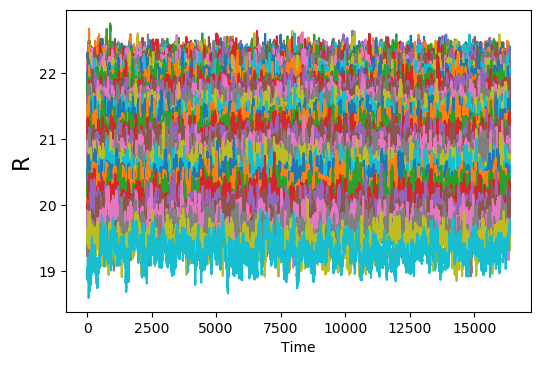

In [6]:
# NP = 2
nmeas = 16384

# NP = 1
# nmeas = 32768

# NP = 8
# nmeas = 4096

NP = 4
# nmeas = 8192

# NP = 16
# nmeas = 2048
kk = 0

Tdata = []
PSD2 = []
Omega = []
dRdata = []
fs = 1000.

beta = 10.0
window_length = 1024
numoverlap = window_length/2.
kaiserw = signal.get_window(('kaiser', beta), window_length) # Kaiser window
# boxcarw = signal.boxcar(window_length)

for i in range(nn):
    tdata = np.loadtxt(path + "t_data_" + str(i) + ".dat")
    tdata = tdata.reshape((NP,nmeas))
    R0 = np.mean(tdata,axis=1)
    R0 = R0.reshape((NP,1))
    R0 = np.dot(R0,np.ones((1,nmeas)))
#     print(R0)
    delR = tdata - R0
#     fval, R_ps = np.absolute(signal.welch((delR/R0), fs)
    fval, R_ps = np.absolute(signal.welch((delR/R0), fs, nperseg = window_length, window=kaiserw, noverlap = numoverlap)) ## PSD using welch method
#     fval, R_ps = np.absolute(signal.welch((delR/R0), fs, nperseg = window_length, window=boxcarw, noverlap = numoverlap)) ## PSD using welch method
    Tdata.append(tdata)
    dRdata.append(delR[kk,:]/R0[kk,:])
    PSD2.append(R_ps)
    Omega.append(fval)
#     plt.plot(delR[kk,:]/R0[kk,:] , label = "Vt = " + format(Vt_up[i], '.2f') )
#     if Vt_up[i] > 400. and Vt_up[i] < 520.0:
    plt.plot(tdata[kk,:], label = "Vt = " + format(Vt_up[i], '.2f') )


    
Tdata = np.array(Tdata)
PSD2 = np.array(PSD2)
Omega = np.array(Omega)
dRdata = np.array(dRdata)
print(np.shape(Tdata) , np.shape(PSD2) , np.shape(Omega))
plt.xlabel("Time")
plt.ylabel(r'$\frac{\Delta R}{\langle R \rangle}$', fontsize = 16)
plt.ylabel("R")
# # plt.ylim(0,10)
# plt.legend(title = "Voltage", bbox_to_anchor=(1.01, 1), loc='upper left')
# plt.xlim(1000,4000)
# plt.title("R vs t, $N_{meas} = 4096$ , $m_x = m_y = 64$  ")
# plt.savefig(path+"Rvt.pdf", bbox_inches='tight')
plt.show()

(50, 4, 513) (50, 513)


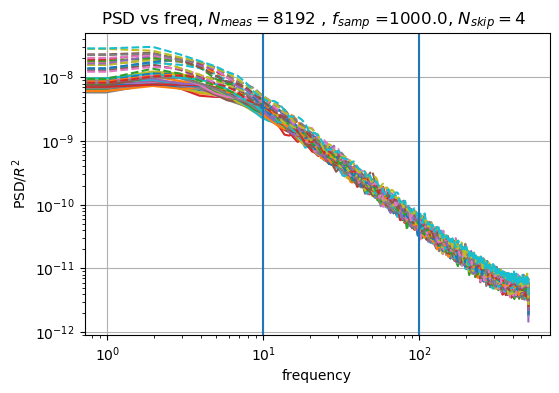

In [7]:
# print(Omega[1,:])
PSD_av = np.mean(PSD2,axis=1)
print(np.shape(PSD2) , np.shape(PSD_av))
upper = 100.
lower = 10.
for i in range(nn):
    PSD_av[i,:] = PSD_av[i,:]/Alldata[i,7]**2

for i in range(nn):
    if Vt_up[i] <= Vcrit:
        plt.loglog(Omega[i,:], PSD_av[i,:], label = "Vt = " + format(Vt_up[i], '.3f'))#,linestyle='dashed' )
# #         plt.semilogy(Omega[i,:], PSD_av[i,:], label = "Vt = " + format(Vt_up[i], '.2f') )        
    else :
        plt.loglog(Omega[i,:], PSD_av[i,:], label = "Vt = " + format(Vt_up[i], '.2f'),linestyle='dashed' )
#         plt.semilogy(Omega[i,:], PSD_av[i,:], label = "Vt = " + format(Vt_up[i], '.2f'))#,linestyle='dashed' )
#         None


#     plt.loglog(Omega[i,:], PSD[i,:])

# plt.title("PSD vs freq, $N_{meas} = 16384$ , $f_{samp}$ ="+ format(fs, '.1f') + ", $N_{skip} = 2$  ")
plt.title("PSD vs freq, $N_{meas} = 8192$ , $f_{samp}$ ="+ format(fs, '.1f') + ", $N_{skip} = 4$  ")
plt.ylabel("PSD/$R^2$")
plt.xlabel("frequency")
# plt.xlim(1,1000)
# plt.legend()
plt.axvline(x=lower)
plt.axvline(x=upper)

# plt.ylim(1.0E-9,1.0E-2)

plt.grid(b=True,which='major', axis='both')
# plt.legend()
# plt.savefig(path+"PSDvf_ns4.pdf")
plt.show()

768.6


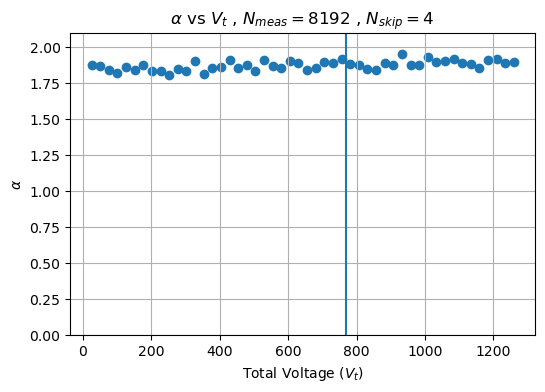

In [8]:
alpha_up = []
alpha_dn = []
yint = []
print(Vcrit)
# print(Omega[0,150])
# print(Omega[1,:])
upper_cut_off = int(np.argwhere(np.around(Omega[0,:]) == int(upper)))
lower_cut_off = int(np.argwhere(np.around(Omega[0,:]) == int(lower)))
# lower_cut_off = 1
for i in range(nn):
    if Vt_up[i] <= Vcrit:
#         upper_cut_off = int(upper)
#         lower_cut_off = int(lower)
        lg_Omega = np.log(Omega[i,lower_cut_off:upper_cut_off])
        lg_PSD = np.log(PSD_av[i,lower_cut_off:upper_cut_off])
        p = np.polyfit(lg_Omega, lg_PSD, deg = 1)
#     slope, intercept, r_value, p_value, std_err = stats.linregress(lg_Omega, lg_PSD)
#     alpha_up.append(-slope)
#         alpha_up.append(-p[0])
    else: 
#         upper_cut_off = int(upper)
#         lower_cut_off = int(lower)
        lg_Omega = np.log(Omega[i,lower_cut_off:upper_cut_off])
        lg_PSD = np.log(PSD_av[i,lower_cut_off:upper_cut_off])
        p = np.polyfit(lg_Omega, lg_PSD, deg = 1)
#     slope, intercept, r_value, p_value, std_err = stats.linregress(lg_Omega, lg_PSD)
#     alpha_up.append(-slope)
#         alpha_up.append(-p[0])
    alpha_up.append(-p[0])
    yint.append(p[1])
    
# cutofffreq = window_length//2
# for i in range(nn):
#     lg_Omega = np.log(Omega[i,1:])
#     lg_PSD = np.log(PSD[i,1:])
#     p = np.polyfit(lg_Omega, lg_PSD, deg = 1)
# #     slope, intercept, r_value, p_value, std_err = stats.linregress(lg_Omega, lg_PSD)
# #     alpha_up.append(-slope)
#     alpha_up.append(-p[0])

alpha_up = np.array(alpha_up)
alpha_dn = np.array(alpha_dn)
yint = np.array(yint)
# print(alpha_up)
# print("Maximum alpha " , np.max(alpha_up))
# print("Alpha at chosen critical point :", alpha_up[k2] )
# print(Vt_up[int(np.argmax(alpha_up))])

# print(np.shape(alpha_up), np.shape(alpha_dn))
# np.savetxt(path + "A_m1_02.dat", alpha_up)

plt.axvline(x=Vcrit)
# plt.plot(E_up,alpha_up,label="Up")
plt.scatter(Vt_up[0:nn],alpha_up,label="Up")
# plt.scatter(E_dn_py,alpha_dn, c = "RoyalBlue", label="Down")
# plt.title(r'$\alpha$' + " vs E , $N_{meas} = 16384$ , $N_{skip} = 2$ ")
plt.title(r'$\alpha$' + " vs $V_t$ , $N_{meas} = 8192$ , $N_{skip} =4$ ")
# plt.legend()
# np.savetxt(path+"alpha_n16.dat", alpha_up)
# plt.xlim(20.0,30.0)
plt.ylim(0.0,2.1)
plt.xlabel(r'Total Voltage ($V_t$)')
plt.ylabel(r'$\alpha$')
plt.grid(b=True,which='major', axis='both')
# plt.savefig(path+"alpvf_ns4.pdf")
plt.show()
    





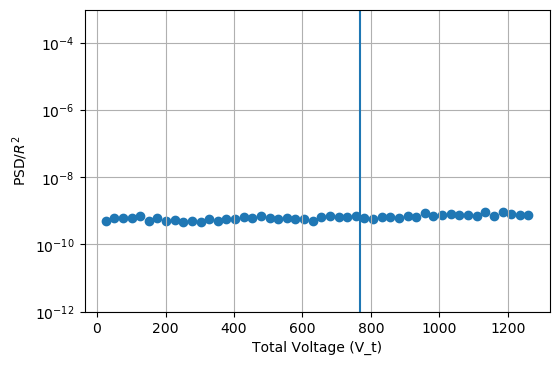

In [9]:
# print(Omega[0,:])
PSD_snap = PSD_av[:,Omega[0,:] == 25.390625] 
# print(PSD_snap.reshape(nn))
plt.scatter(Vt_up[0:nn],PSD_snap)
plt.yscale('log')
plt.axvline(x=Vcrit)
plt.ylim(1.0E-12,1.0E-3)
# plt.xlim(0.6,1.5)
plt.ylabel("PSD/$R^2$")
plt.xlabel(r'Total Voltage (V_t)')
plt.grid(b=True,which='major', axis='both')
plt.show()

No handles with labels found to put in legend.


Text(0.5, 1.0, '$\\frac{\\Delta R}{\\langle R \\rangle}$ vs t, $N_{skip} = 4$')

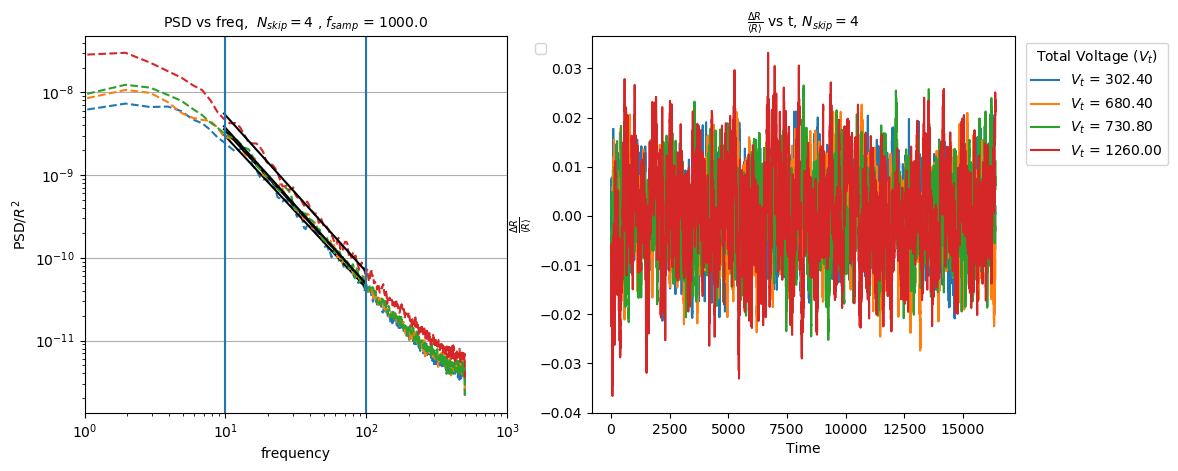

In [10]:
def ff(xx,a,b):
    return (1/xx**a)*np.exp(b)


f = plt.figure(figsize=(12, 5)); # plot the calculated values    

sp =  f.add_subplot(1, 2, 1 );
for kk in karr:
    plt.loglog(Omega[kk,:], PSD_av[kk,:], linestyle = "dashed" )#, label = "T = " + format(T_up[kk], '.2f') 
    plt.loglog(Omega[kk,lower_cut_off:upper_cut_off],ff(Omega[kk,lower_cut_off:upper_cut_off],alpha_up[kk],yint[kk]), color = 'black')
    
    
plt.title("PSD vs freq,  $N_{skip} = 4$ , $f_{samp}$ = "+ format(fs, '.1f'), fontsize = 10 )
plt.ylabel("PSD/$R^2$", fontsize = 10)
plt.xlabel("frequency", fontsize = 10)
plt.xlim(1,1000)
# # plt.legend()
plt.axvline(x=lower)
plt.axvline(x=upper)
# plt.ylim(1.0E-9,1.0E-2)
# plt.savefig(path+"PSDvf.pdf")
plt.grid(b=True,which='major', axis='both')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()
l=0
sp =  f.add_subplot(1, 2, 2 );
for kk in karr:
#     kk = kkk-1
#     plt.plot(Tdata[kk,0,:], label = "T = " + format(T_up[kk], '.2f') )
    plt.plot(dRdata[kk,:], label = "$V_t$ = " + format(Vt_up[kk], '.2f') )
#     plt.axhline(y=l, color = 'black')
#     l+=0.4
    
plt.xlabel("Time", fontsize = 10)
plt.ylabel(r'$\frac{\Delta R}{\langle R \rangle}$', fontsize = 10)
# plt.ylabel("R")
# plt.xlim(2000,6000)
plt.legend(title=r'Total Voltage ($V_t$)', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.title(r'$\frac{\Delta R}{\langle R \rangle}$ vs t, $N_{skip} = 4$', fontsize = 10)
# plt.title("R vs t, $N_{skip} = 4$", fontsize = 14)
# plt.savefig(path+"Rvt.pdf")
# plt.show()


# plt.savefig(path+"Case_dc_ns4.pdf",bbox_inches='tight')

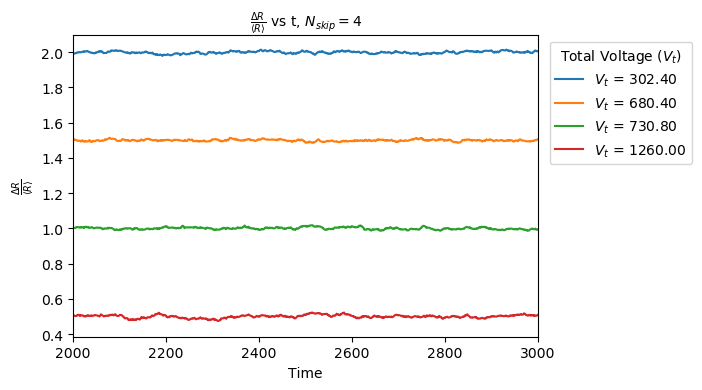

In [11]:
l = 2
for kk in karr:
#     plt.plot(Tdata[kk,0,:], label = r'$V_t$ = ' + format(Vt_up[kk], '.2f') )
    plt.plot(dRdata[kk,:] + l, label = r'$V_t$ = ' + format(Vt_up[kk], '.2f') )
    l -= 0.5
#     plt.axvline(y=l)
    
    
plt.xlabel("Time", fontsize = 10)
plt.ylabel(r'$\frac{\Delta R}{\langle R \rangle}$', fontsize = 10)
# plt.ylabel("R")
plt.xlim(2000,3000)
plt.legend(title=r'Total Voltage ($V_t$)', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.title(r'$\frac{\Delta R}{\langle R \rangle}$ vs t, $N_{skip} = 4$', fontsize = 10)
# plt.title("R vs t, $N_{skip} = 4$ , $V_{crit} = $" + format(Vcrit, '.2f'), fontsize = 14)
# plt.savefig(path+"dRvt_ns4.pdf" ,bbox_inches='tight')
plt.show()

